<a href="https://colab.research.google.com/github/aaryyya/ZelestraXAWS/blob/main/Zelstra_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display basic info and column types
print("Train Dataset Info:")
print(train.info(), "\n")


print("Missing values in Train set:")
print(train.isnull().sum(), "\n")

print("Test Dataset Info:")
print(test.info(), "\n")

print("Missing values in Test set:")
print(test.isnull().sum(), "\n")


# Count of missing values in each dataset




Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-nul

In [3]:
# Object-type numeric columns
numeric_like_objects = ['humidity', 'wind_speed', 'pressure']

for col in numeric_like_objects:
    train[col] = pd.to_numeric(train[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')


In [4]:
# All true numerical features for imputation
numerical_cols = [
    'temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count',
    'soiling_ratio', 'voltage', 'current', 'module_temperature',
    'cloud_coverage', 'wind_speed', 'pressure'
]

# Median imputation for train
for col in numerical_cols:
    train.fillna({col: train[col].median()}, inplace=True)

# Median imputation for test
for col in numerical_cols:
    test.fillna({col: test[col].median()}, inplace=True)




In [5]:
categorical_cols = ['string_id', 'error_code', 'installation_type']

# Mode imputation for train
for col in categorical_cols:
    train.fillna({col: train[col].mode()[0]}, inplace=True)

# Mode imputation for test
for col in categorical_cols:
    test.fillna({col: test[col].mode()[0]}, inplace=True)


In [6]:
print("Train missing values after imputation:\n", train.isnull().sum())
print("\nTest missing values after imputation:\n", test.isnull().sum())


Train missing values after imputation:
 id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
efficiency            0
dtype: int64

Test missing values after imputation:
 id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['string_id', 'error_code', 'installation_type']
encoders = {}

# Fit on train, apply on both
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    encoders[col] = le  # save encoders if needed for inverse mapping later


In [8]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = train.columns.drop(['id', 'efficiency'])

scaler = StandardScaler()

train[features_to_scale] = scaler.fit_transform(train[features_to_scale])
test[features_to_scale] = scaler.transform(test[features_to_scale])


In [9]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train columns:", train.columns.tolist())
# Display basic info and column types
print("Train Dataset Info:")
print(train.info(), "\n")


print("Missing values in Train set:")
print(train.isnull().sum(), "\n")

print("Test Dataset Info:")
print(test.info(), "\n")

print("Missing values in Test set:")
print(test.isnull().sum(), "\n")


Train shape: (20000, 17)
Test shape: (12000, 16)
Train columns: ['id', 'temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure', 'string_id', 'error_code', 'installation_type', 'efficiency']
Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         20000 non-null  float64
 2   irradiance          20000 non-null  float64
 3   humidity            20000 non-null  float64
 4   panel_age           20000 non-null  float64
 5   maintenance_count   20000 non-null  float64
 6   soiling_ratio       20000 non-null  float64
 7   voltage             20000 non-null  float64
 8   current             20000 non-null  float64
 9   module_tempera

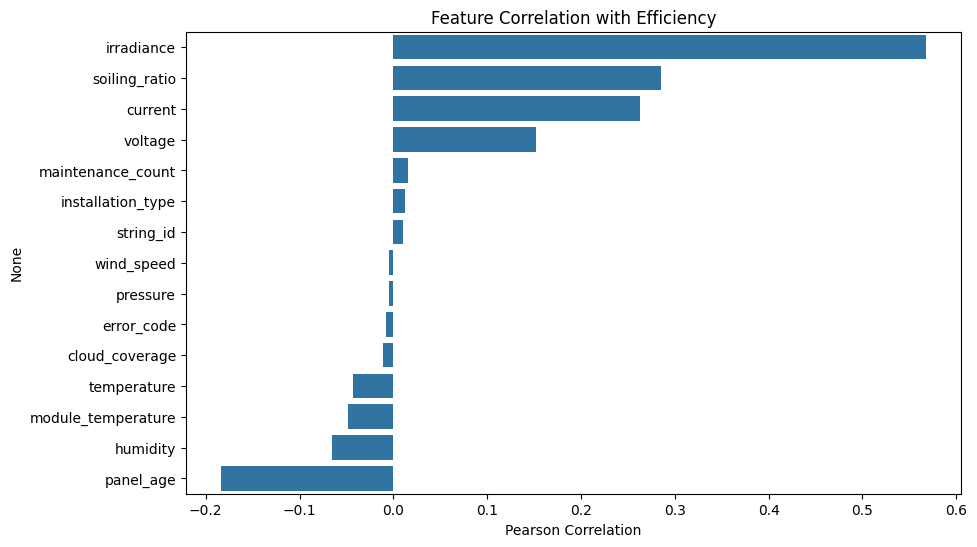

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
cor_matrix = train.drop(columns=['id']).corr()

# Target correlation
target_corr = cor_matrix['efficiency'].drop('efficiency').sort_values(ascending=False)

# Plot top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Correlation with Efficiency')
plt.xlabel('Pearson Correlation')
plt.show()





In [11]:
from sklearn.feature_selection import VarianceThreshold

# Remove near-constant features
selector = VarianceThreshold(threshold=0.01)
X = train.drop(columns=['id', 'efficiency'])
X_high_var = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]


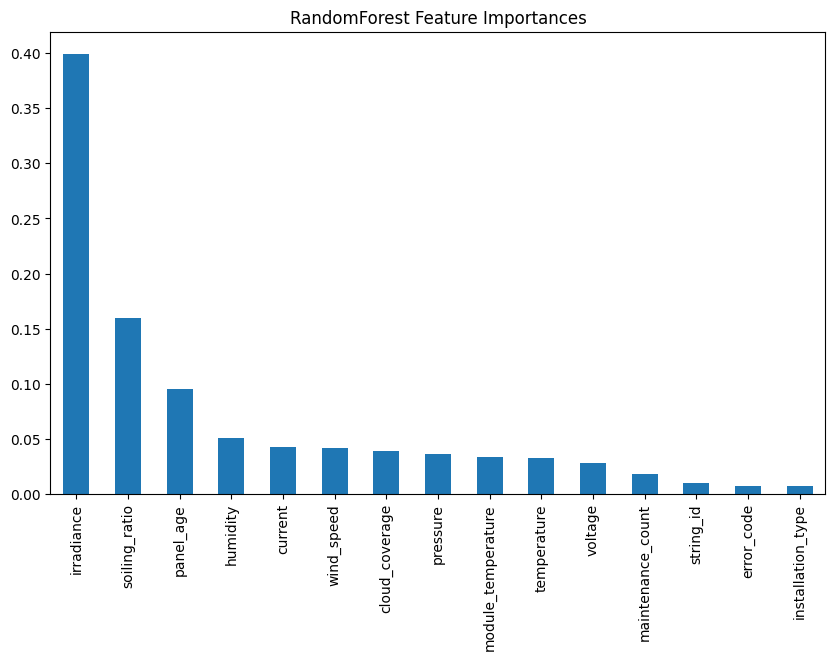

In [12]:
from sklearn.ensemble import RandomForestRegressor

X = train[selected_columns]
y = train['efficiency']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("RandomForest Feature Importances")
plt.show()


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X, y)

# Final selected features
rfe_selected = X.columns[selector.support_]
print(rfe_selected)

Index(['temperature', 'humidity', 'panel_age', 'soiling_ratio', 'irradiance',
       'voltage', 'current', 'module_temperature', 'maintenance_count'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


In [14]:
# Combine feature sets
features_corr = set(target_corr[abs(target_corr) > 0.1].index)
features_rf = set(importances.head(12).index)
features_rfe = set(rfe_selected)

# Final selected features (high-confidence)
final_features = list(features_corr & features_rf & features_rfe)
print("Selected Features:", final_features)


Selected Features: ['current', 'irradiance', 'panel_age', 'soiling_ratio', 'voltage']


In [38]:
final_features = [
    'temperature',
    'humidity',
    'panel_age',
    'soiling_ratio',
    'irradiance',
    'voltage',
    'current',
    'module_temperature',
    'maintenance_count',
    'installation_type',
    'error_code',
    'pressure'
]

X_train = train[final_features]
y_train = train['efficiency']

X_test = test[final_features]


In [39]:
from sklearn.model_selection import train_test_split

X_train = train[final_features]
y_train = train['efficiency']

# 80/20 split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

def custom_score(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    score = 100 * (1 - np.sqrt(mse))
    return score



In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_tr, y_tr)
lr_pred = lr.predict(X_val)
print("Linear Regression Score:", custom_score(y_val, lr_pred))


Linear Regression Score: 89.18227724108854


In [19]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_tr, y_tr)
dt_pred = dt.predict(X_val)
print("Decision Tree Score:", custom_score(y_val, dt_pred))


Decision Tree Score: 87.47376818508717


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
rf.fit(X_tr, y_tr)
rf_pred = rf.predict(X_val)
print("Random Forest Score:", custom_score(y_val, rf_pred))


Random Forest Score: 89.14292928064658


In [41]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, random_state=42)
xgb.fit(X_tr, y_tr)
xgb_pred = xgb.predict(X_val)
print("XGBoost Score:", custom_score(y_val, xgb_pred))
from xgboost import XGBRegressor

param_grid = [
    {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8},
    {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.05, 'subsample': 0.9, 'colsample_bytree': 0.8},
    {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.03, 'subsample': 1.0, 'colsample_bytree': 0.7},
    {'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.07, 'subsample': 0.7, 'colsample_bytree': 1.0}
]

best_score = -np.inf
best_model = None

for i, params in enumerate(param_grid):
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    score = custom_score(y_val, preds)
    print(f"Model {i+1} Score: {score:.4f}")

    if score > best_score:
        best_score = score
        best_model = model
test_features = test[final_features]
test_preds = best_model.predict(test_features)
submission = pd.DataFrame({
    'id': test['id'],
    'efficiency': test_preds
})

submission.to_csv('submission.csv', index=False)
print(submission.head())
print(submission.shape)


XGBoost Score: 89.04146869231069
Model 1 Score: 89.2343
Model 2 Score: 89.2335
Model 3 Score: 89.1358
Model 4 Score: 88.9537
   id  efficiency
0   0    0.386846
1   1    0.562250
2   2    0.540428
3   3    0.438544
4   4    0.477613
(12000, 2)


In [22]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3},
    {'n_estimators': 250, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 1}
]

best_rf_score = -np.inf
best_rf_model = None

for i, params in enumerate(param_grid_rf):
    rf_model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    rf_model.fit(X_tr, y_tr)
    preds = rf_model.predict(X_val)
    score = custom_score(y_val, preds)
    print(f"RandomForest Model {i+1} Score: {score:.4f}")

    if score > best_rf_score:
        best_rf_score = score
        best_rf_model = rf_model
rf_test_preds = best_rf_model.predict(test[final_features])
rf_submission = pd.DataFrame({
    'id': test['id'],
    'efficiency': rf_test_preds
})

rf_submission.to_csv('rf_submission.csv', index=False)


RandomForest Model 1 Score: 89.1913
RandomForest Model 2 Score: 89.1595
RandomForest Model 3 Score: 89.2160
RandomForest Model 4 Score: 89.0980


In [42]:
from xgboost import XGBRegressor

param_grid = [
    {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0.5, 'reg_lambda': 1.0},
    {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.02, 'subsample': 0.85, 'colsample_bytree': 0.75, 'gamma': 0.2, 'reg_alpha': 1.0, 'reg_lambda': 2.0},
    {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.7, 'gamma': 0.05, 'reg_alpha': 0.1, 'reg_lambda': 0.5}
]
best_score = -np.inf
best_model = None

for i, params in enumerate(param_grid):
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_tr[final_features], y_tr)
    preds = model.predict(X_val[final_features])
    score = custom_score(y_val, preds)
    print(f"Model {i+1} Score: {score:.4f}")

    if score > best_score:
        best_score = score
        best_model = model
test_features = test[final_features]
test_preds = best_model.predict(test_features)

submission = pd.DataFrame({
    'id': test['id'],
    'efficiency': test_preds
})
submission.to_csv('xgb1_submission.csv', index=False)

print("🔍 Final Submission Preview:")
print(submission.head())
print("📝 Submission Shape:", submission.shape)


Model 1 Score: 89.3184
Model 2 Score: 89.3054
Model 3 Score: 89.3183
🔍 Final Submission Preview:
   id  efficiency
0   0    0.390584
1   1    0.553708
2   2    0.524172
3   3    0.452074
4   4    0.485919
📝 Submission Shape: (12000, 2)


In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define the custom score function
def custom_score(actual, predicted):
    return 100 * (1 - np.sqrt(mean_squared_error(actual, predicted)))

# Assuming train and test are already preprocessed and available
# Define final features as per your request
final_features = [
    'temperature', 'humidity', 'panel_age', 'soiling_ratio',
    'irradiance', 'voltage', 'current', 'module_temperature', 'maintenance_count'
]

# Split the training data into train/validation sets
X = train[final_features]
y = train['efficiency']
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Enhanced hyperparameter grid
param_grid = [
    {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0.2, 'reg_alpha': 0.8, 'reg_lambda': 1.2},
    {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.015, 'subsample': 0.95, 'colsample_bytree': 0.7, 'gamma': 0.3, 'reg_alpha': 1.2, 'reg_lambda': 2.5},
    {'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.012, 'subsample': 0.85, 'colsample_bytree': 0.75, 'gamma': 0.1, 'reg_alpha': 0.3, 'reg_lambda': 1.5}
]

# Model selection loop
best_score = -np.inf
best_model = None

for i, params in enumerate(param_grid):
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    score = custom_score(y_val, preds)
    print(f"Model {i+1} Score: {score:.4f}")

    if score > best_score:
        best_score = score
        best_model = model

# Final prediction and submission
test_preds = best_model.predict(test[final_features])
submission = pd.DataFrame({
    'id': test['id'],
    'efficiency': test_preds
})
submission.to_csv("submission.csv", index=False)


Model 1 Score: 89.3132
Model 2 Score: 89.2737
Model 3 Score: 89.3400
